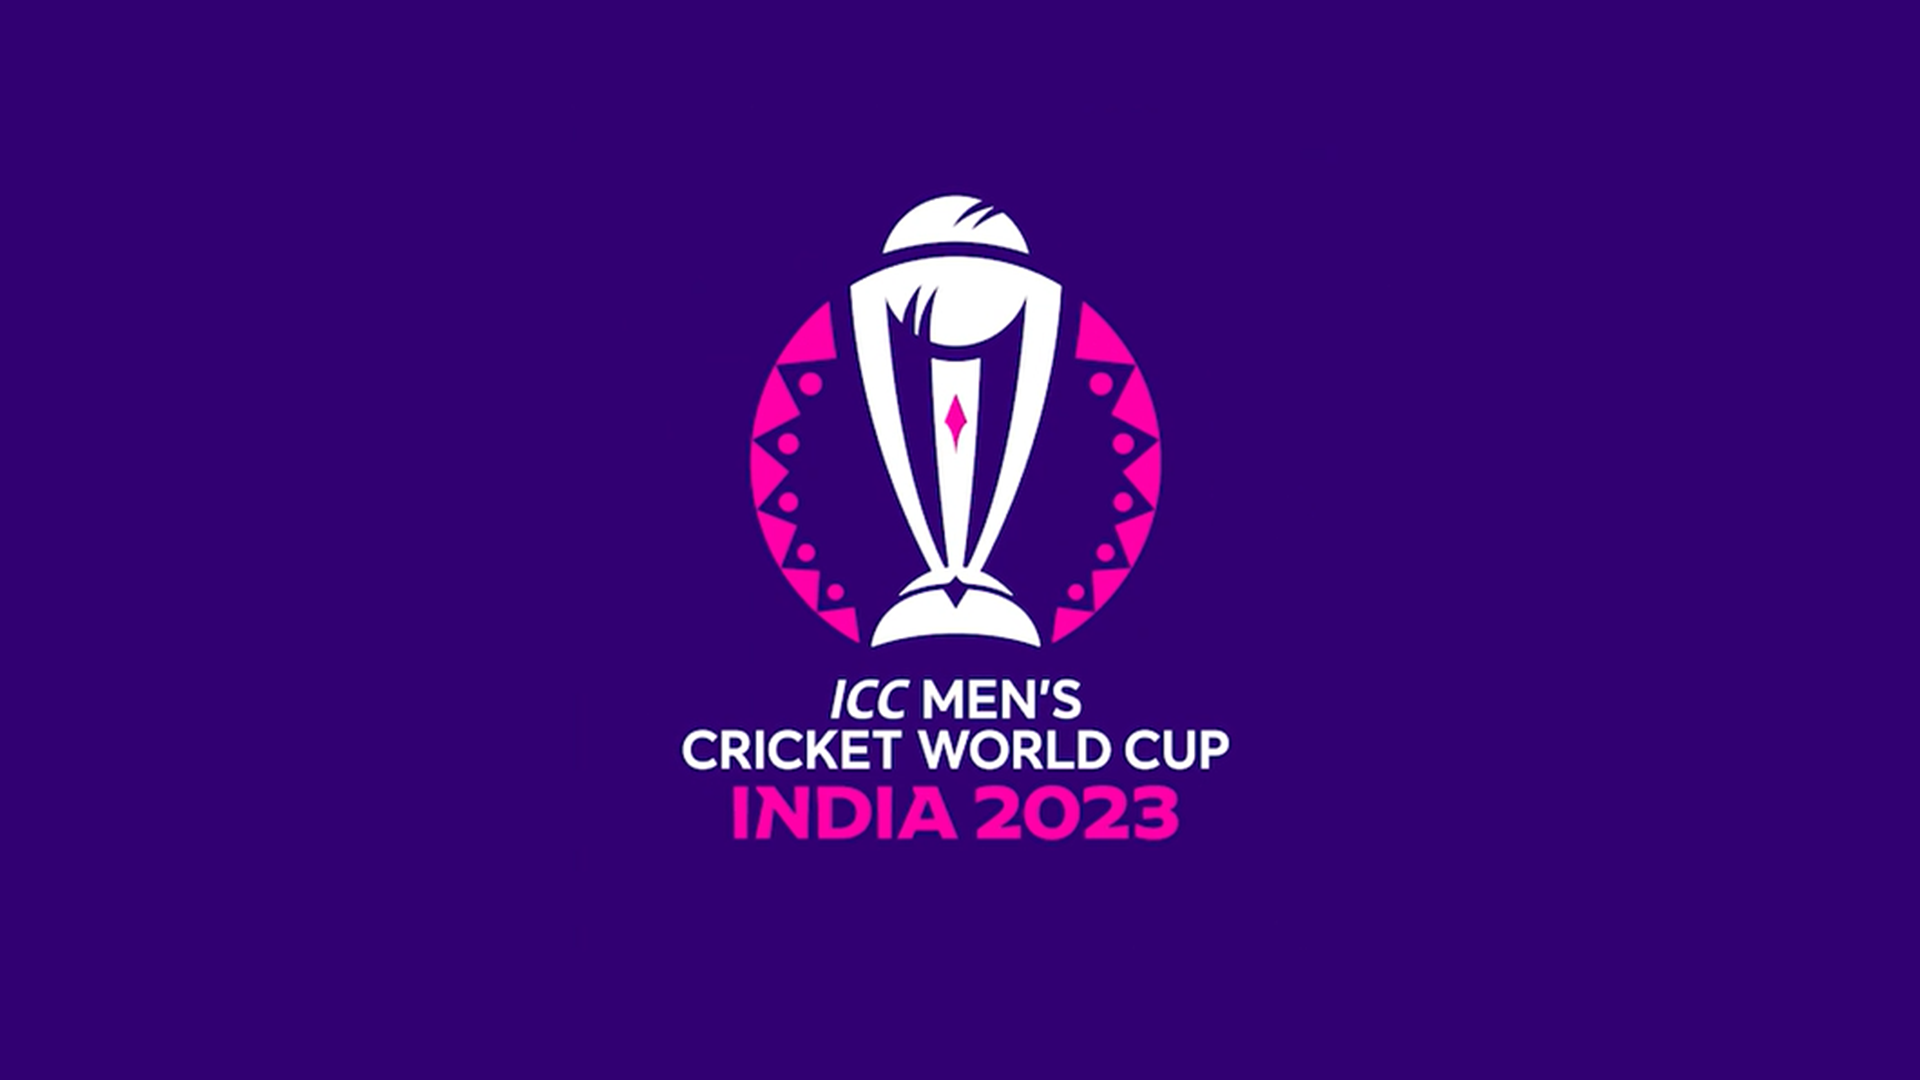

In [2]:
from IPython.display import Image
Image(filename="ICC_WC23.png",width=500, height=400)

<b>PROBLEM STATMENT </b> :-
Perform the data analysis on the given data of ICC Mens WC 2023 tournament only using pure                   
python libraries no tools required. The analysis should include following contents               
1) Overall Analysis              
2) Batting Analysis                   
3) Bowling Analysis                   
4) Player wise Analysis
5) Team wise Analysis

## <b> 1.0 About Author </b>

#### • Author Name : Sagar Nagpure
#### • Project : Complete EDA on ICC Men's Cricket World Cup 2023 

## <b>2.0 Data Processing </b>

#### 2.1 Importing Libraries 

In [3]:
# For data manipulation

import numpy as np
import pandas as pd

# For data visualization 

import matplotlib.pyplot as plt 
import seaborn as sns

#### 2.2 Avoid Warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')

#### 2.3 Loading Dataset and having a sneak peek of it

In [5]:
# Loading the dataset
df = pd.read_csv('deliveries.csv',encoding= 'unicode_escape')

In [6]:
# Printing the first 5 rows of the datasets
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(26119, 22)

In [8]:
# Having a look that how data looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26119 entries, 0 to 26118
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                26119 non-null  int64  
 1   season                  26119 non-null  object 
 2   start_date              26119 non-null  object 
 3   venue                   26119 non-null  object 
 4   innings                 26119 non-null  int64  
 5   ball                    26119 non-null  float64
 6   batting_team            26119 non-null  object 
 7   bowling_team            26119 non-null  object 
 8   striker                 26119 non-null  object 
 9   non_striker             26119 non-null  object 
 10  bowler                  26119 non-null  object 
 11  runs_off_bat            26119 non-null  int64  
 12  extras                  26119 non-null  int64  
 13  wides                   665 non-null    float64
 14  noballs                 56 non-null   

In [9]:
# Let's see the shape of the dataset
df.shape

(26119, 22)

In [10]:
# Let's see which columns are there in the dataset
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

#### 2.3 About Missing Values

## <b>3.0 Now Lets Starts the Analysis</b> 

#### 3.1 Overall Analysis :

#### 3.1.1 Total Number of Sixes hit in ICC WC 2023

In [11]:
WCT_6 = df[df['runs_off_bat'] == 6]['runs_off_bat'].count()
WCT_6

644

In [12]:
WCT_4 = df[df['runs_off_bat'] == 4]['runs_off_bat'].count()
WCT_4

2241

#### 3.1.2 Let's compare the number of sixes and the number of fours hit in ICC Men's WC 2023

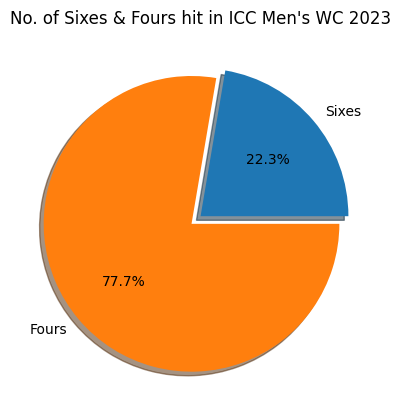

In [13]:
# Plotting a pie graph to compare both of 6's & 4's
plt.pie([WCT_6, WCT_4], labels= ['Sixes', 'Fours'], autopct= '%1.1f%%',explode=[0,0.08], shadow = True)
plt.title("No. of Sixes & Fours hit in ICC Men's WC 2023")
plt.show()

#### 3.1.3 Total Number of teams participated in ICC Men's WC 2023

In [14]:
list(set(df['batting_team'].unique().tolist()))

['Sri Lanka',
 'England',
 'India',
 'Afghanistan',
 'New Zealand',
 'Bangladesh',
 'Australia',
 'Pakistan',
 'Netherlands',
 'South Africa']

## <b>4.0 Batting Analysis</b>

In [15]:
df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)

striker
V Kohli             765
RG Sharma           597
Q de Kock           594
R Ravindra          578
DJ Mitchell         552
                   ... 
MADI Hemantha         4
JR Hazlewood          4
Fazalhaq Farooqi      2
AT Carey              0
Usama Mir             0
Name: runs_off_bat, Length: 146, dtype: int64

In [16]:
top_10 = df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)
top_10

striker
V Kohli              765
RG Sharma            597
Q de Kock            594
R Ravindra           578
DJ Mitchell          552
DA Warner            535
SS Iyer              530
KL Rahul             452
HE van der Dussen    448
MR Marsh             441
Name: runs_off_bat, dtype: int64

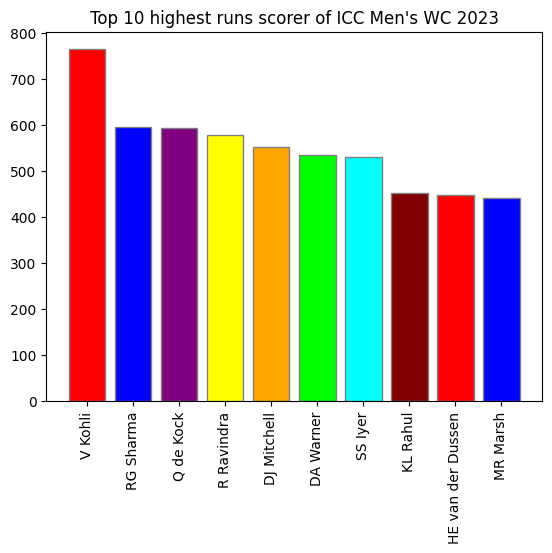

In [17]:
# Lets plot the bar plot of the top 10 higest runs scorer of ICC Men's WC 
color = ['red','blue', 'purple', 'yellow', 'orange', 'lime','aqua','maroon']
plt.bar(top_10.index, top_10.values, color = color, edgecolor = "gray")
plt.title("Top 10 highest runs scorer of ICC Men's WC 2023")
plt.xticks(rotation = 'vertical')
plt.show()

#### 4.1.0 Top 10 players who hit most number of sixes in ICC WC 2023

In [18]:
sixes_df = df[df['runs_off_bat'] == 6]
sixes_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10)

striker
RG Sharma       31
SS Iyer         24
DA Warner       24
GJ Maxwell      22
DJ Mitchell     22
MR Marsh        21
Q de Kock       21
DA Miller       20
H Klaasen       19
Fakhar Zaman    18
Name: runs_off_bat, dtype: int64

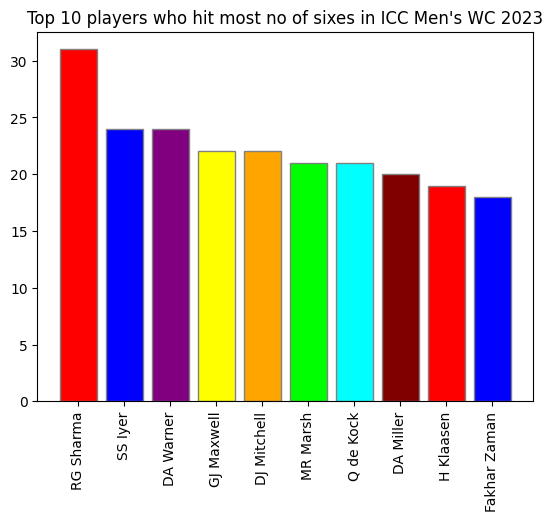

In [19]:
plt.bar(sixes_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).index,
        sixes_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).values,
        color = color,  edgecolor = "gray")
plt.title("Top 10 players who hit most no of sixes in ICC Men's WC 2023")
plt.xticks(rotation = 'vertical')
plt.show()

#### 4.1.1 Top 10 batsman who hit most number of sixes in single match

In [20]:
result_1 = sixes_df.groupby(['match_id','striker'])['runs_off_bat'].count().sort_values(ascending=False).head(10)
result_1

match_id  striker     
35        Fakhar Zaman    11
39        GJ Maxwell      10
18        MR Marsh         9
43        MR Marsh         9
18        DA Warner        9
24        GJ Maxwell       8
46        SS Iyer          8
23        H Klaasen        8
4         BKG Mendis       8
31        Fakhar Zaman     7
Name: runs_off_bat, dtype: int64

In [21]:
# Reseting the index of result_1
result_1 = result_1.reset_index()
result_1

# Converting result_1 into dataframe
result_1 = pd.DataFrame(result_1)
result_1

,match_id,striker,runs_off_bat
0,35,Fakhar Zaman,11
1,39,GJ Maxwell,10
2,18,MR Marsh,9
3,43,MR Marsh,9
4,18,DA Warner,9
5,24,GJ Maxwell,8
6,46,SS Iyer,8
7,23,H Klaasen,8
8,4,BKG Mendis,8
9,31,Fakhar Zaman,7


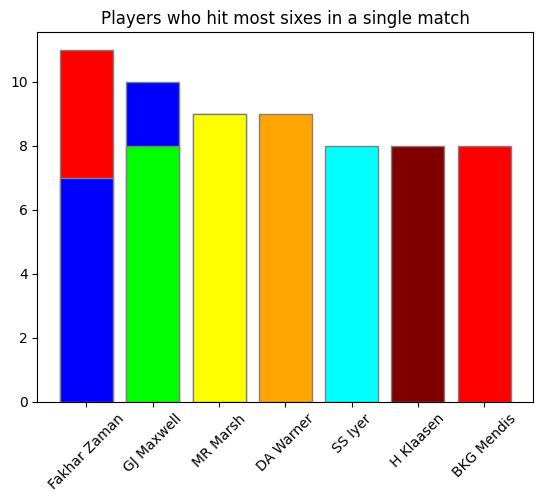

In [22]:
# Let's plot a bar plot of the result_1 using striker & runs_off_bat in matplotlib

plt.bar(result_1['striker'], result_1['runs_off_bat'],
        color = color, edgecolor = "gray")
plt.title("Players who hit most sixes in a single match")
plt.xticks(rotation = 45)
plt.show()

#### 4.1.2 Most Sixes hit in a Venue

In [23]:
sixes_df['venue'].value_counts().head(10)

venue
Wankhede Stadium, Mumbai                                                 106
Arun Jaitley Stadium, Delhi                                               84
M Chinnaswamy Stadium, Bengaluru                                          83
Maharashtra Cricket Association Stadium, Pune                             75
Himachal Pradesh Cricket Association Stadium, Dharamsala                  70
MA Chidambaram Stadium, Chepauk, Chennai                                  60
Narendra Modi Stadium, Ahmedabad                                          54
Eden Gardens, Kolkata                                                     50
Rajiv Gandhi International Stadium, Uppal, Hyderabad                      35
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow     27
Name: count, dtype: int64

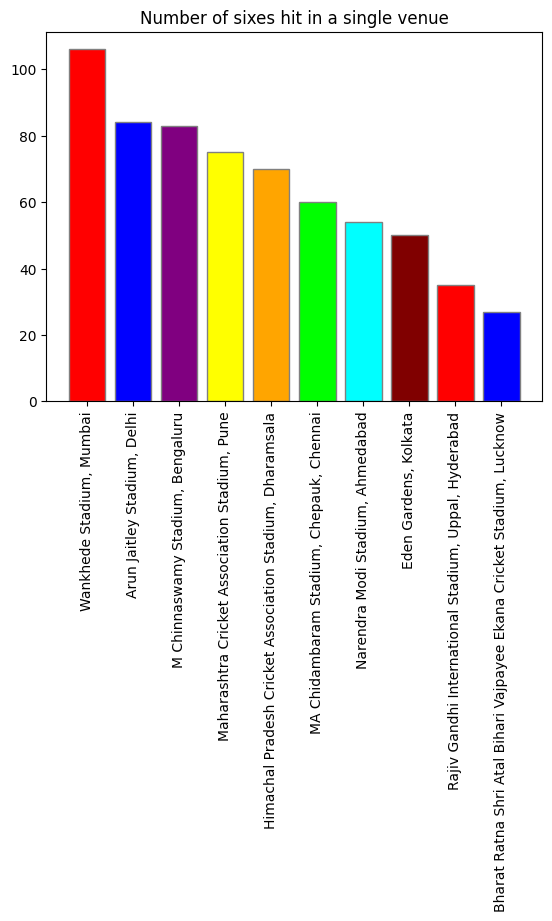

In [24]:
plt.bar(sixes_df['venue'].value_counts().head(10).index, 
        sixes_df['venue'].value_counts().head(10).values, 
        color = color,  edgecolor = "gray")
plt.title("Number of sixes hit in a single venue")
plt.xticks(rotation = 'vertical')
plt.show()

#### 4.1.3 Top 10 players who hit most number of foures in ICC WC 2023

In [25]:
four_df = df[df['runs_off_bat'] == 4]
four_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending = False).head(10)

striker
V Kohli        68
RG Sharma      66
Q de Kock      57
R Ravindra     55
DP Conway      54
DJ Malan       50
DA Warner      50
DJ Mitchell    48
AK Markram     44
P Nissanka     44
Name: runs_off_bat, dtype: int64

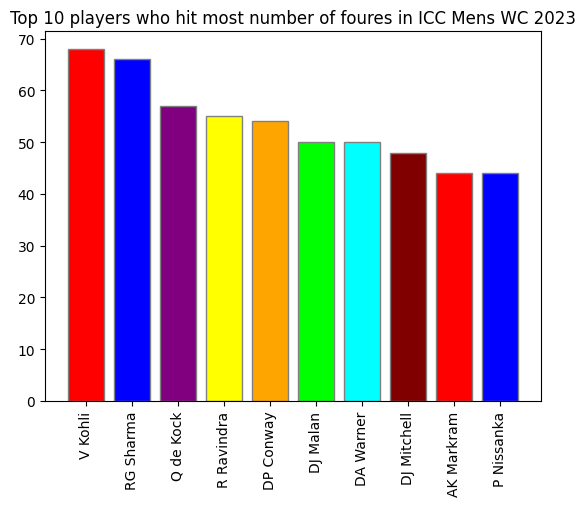

In [26]:
# Lets plot the top 10 players who hit most number of foures in ICC Men's WC 2023

plt.bar(four_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending = False).head(10).index, 
        four_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending = False).head(10).values,
        color = color,  edgecolor = "gray")
plt.title('Top 10 players who hit most number of foures in ICC Mens WC 2023')
plt.xticks(rotation = 'vertical')
plt.show()

#### 4.1.4 Top 10 batsmen who hit most number of fours in sigle match

In [27]:
result2 =  four_df.groupby(['match_id','striker'])['runs_off_bat'].count().sort_values(ascending=False).head(10)
result2

match_id  striker   
39        GJ Maxwell    21
1         DP Conway     19
43        MR Marsh      17
7         DJ Malan      16
9         RG Sharma     16
23        Q de Kock     15
48        TM Head       15
35        R Ravindra    15
8         BKG Mendis    14
4         AK Markram    14
Name: runs_off_bat, dtype: int64

In [28]:
# reset_index of result2
result2 = result2.reset_index()
result2

# converting result2 to dataframe
result2 = pd.DataFrame(result2)
result2

,match_id,striker,runs_off_bat
0,39,GJ Maxwell,21
1,1,DP Conway,19
2,43,MR Marsh,17
3,7,DJ Malan,16
4,9,RG Sharma,16
5,23,Q de Kock,15
6,48,TM Head,15
7,35,R Ravindra,15
8,8,BKG Mendis,14
9,4,AK Markram,14


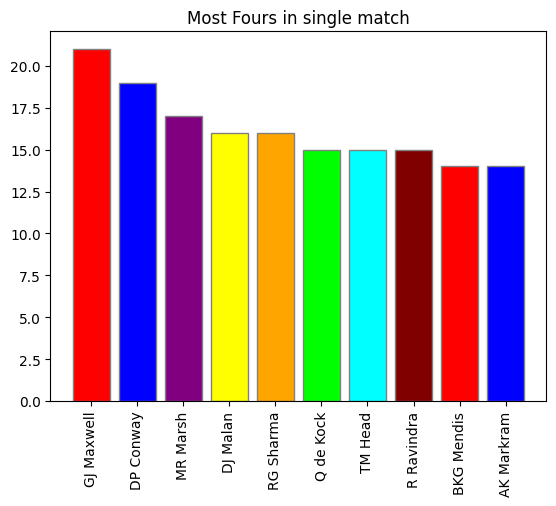

In [29]:
# Lets plot a bar plot of the result2 usign striker and runs_off_bat using matplotlib

plt.bar(result2['striker'], result2['runs_off_bat'], 
        color = color, edgecolor = "gray")
plt.title('Most Fours in single match')
plt.xticks(rotation='vertical')
plt.show()

#### 4.1.5 Most fours hit in a Venue

In [30]:
four_df['venue'].value_counts().head(10)

venue
Arun Jaitley Stadium, Delhi                                              289
M Chinnaswamy Stadium, Bengaluru                                         260
Wankhede Stadium, Mumbai                                                 249
Himachal Pradesh Cricket Association Stadium, Dharamsala                 242
Eden Gardens, Kolkata                                                    220
Maharashtra Cricket Association Stadium, Pune                            219
Narendra Modi Stadium, Ahmedabad                                         212
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow    197
MA Chidambaram Stadium, Chepauk, Chennai                                 189
Rajiv Gandhi International Stadium, Uppal, Hyderabad                     164
Name: count, dtype: int64

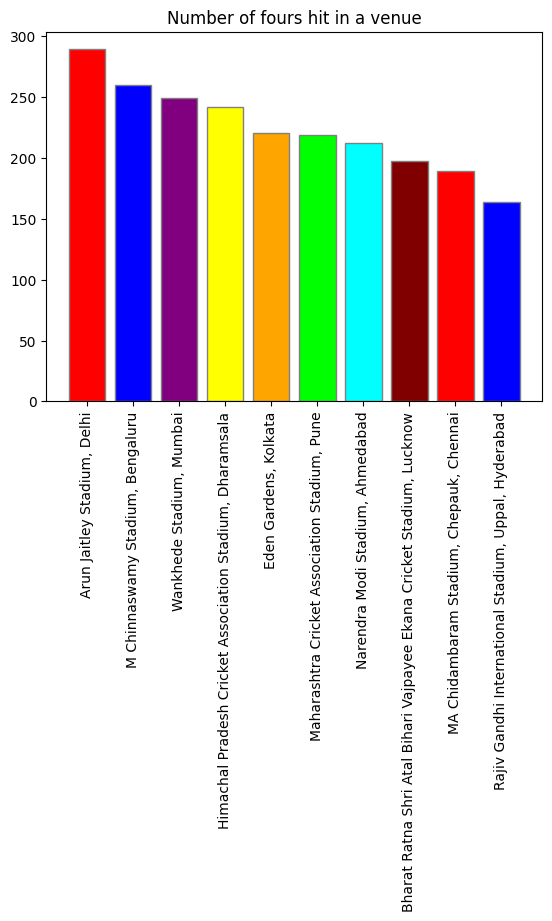

In [31]:
# Lets plot the number of fours hit in a Venue

plt.bar(four_df['venue'].value_counts().head(10).index, 
        four_df['venue'].value_counts().head(10).values,
        color = color,  edgecolor = "gray")
plt.title('Number of fours hit in a venue')
plt.xticks(rotation='vertical')
plt.show()

#### 4.1.6 Top 10 Teams which scored most number of runs in a match

In [32]:
result3 = (df[df['innings'] == 1].groupby(['match_id','batting_team'])['runs_off_bat'].sum() + df[df['innings'] == 1].groupby(['match_id','batting_team'])['extras'].sum()).sort_values(ascending=False).head(10)
result3

match_id  batting_team
4         South Africa    428
45        India           410
35        New Zealand     401
24        Australia       399
20        South Africa    399
46        India           397
27        Australia       388
23        South Africa    382
18        Australia       367
7         England         364
dtype: int64

#### 4.1.7 Top 10 Batsmen who scored most number of runs in a match¶

In [33]:
result3 = df.groupby(['match_id','striker'])['runs_off_bat'].sum().sort_values(ascending=False).head(10)
result3

match_id  striker          
39        GJ Maxwell           201
43        MR Marsh             177
23        Q de Kock            174
18        DA Warner            163
1         DP Conway            152
7         DJ Malan             140
48        TM Head              137
46        DJ Mitchell          134
32        HE van der Dussen    133
8         Mohammad Rizwan      131
Name: runs_off_bat, dtype: int64

In [34]:
# reset the index of result3
result3 = result3.reset_index()
result3

# converting result3 to dataframe
result3 = pd.DataFrame(result3)
result3

,match_id,striker,runs_off_bat
0,39,GJ Maxwell,201
1,43,MR Marsh,177
2,23,Q de Kock,174
3,18,DA Warner,163
4,1,DP Conway,152
5,7,DJ Malan,140
6,48,TM Head,137
7,46,DJ Mitchell,134
8,32,HE van der Dussen,133
9,8,Mohammad Rizwan,131


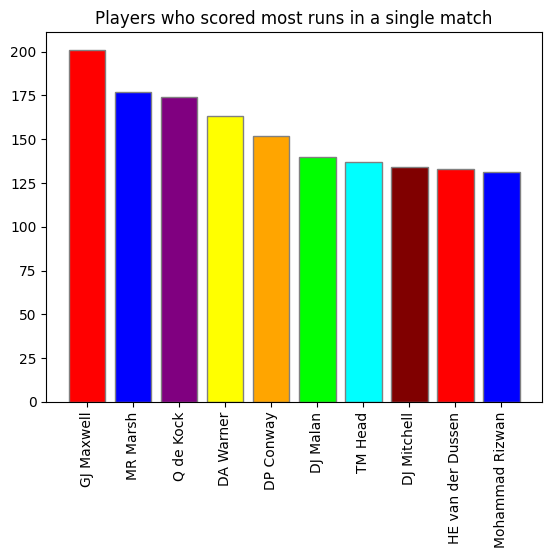

In [35]:
# Lets plot a bar plot of the result3

plt.bar(result3['striker'], result3['runs_off_bat'],
        color = color, edgecolor = "gray")
plt.title('Players who scored most runs in a single match')
plt.xticks(rotation='vertical')
plt.show()

#### 4.1.8 Overall Team Score in ICC CWC_23

In [36]:
(df.groupby('batting_team')['runs_off_bat'].sum() + df.groupby('batting_team')['extras'].sum()).sort_values(ascending = False)

batting_team
India           3160
Australia       3087
South Africa    2897
New Zealand     2864
Pakistan        2328
England         2245
Afghanistan     2095
Bangladesh      2053
Sri Lanka       2048
Netherlands     1862
dtype: int64

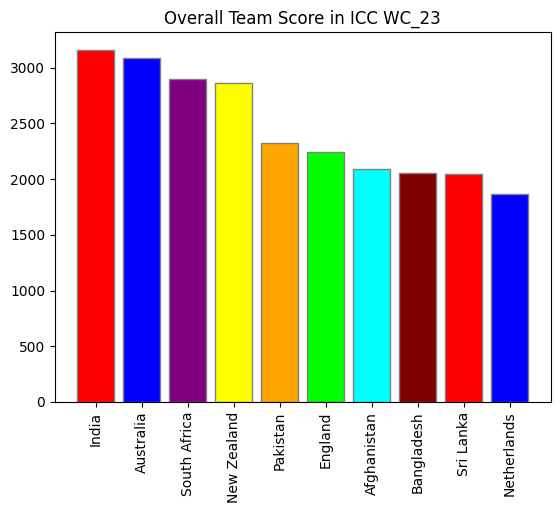

In [37]:
# lets plot the bar chart of the overall team score in the ICC Men's WC 2023

plt.bar((df.groupby('batting_team')['runs_off_bat'].sum() + df.groupby('batting_team')['extras'].sum()).sort_values(ascending = False).index, 
        (df.groupby('batting_team')['runs_off_bat'].sum() + df.groupby('batting_team')['extras'].sum()).sort_values(ascending = False).values,
        color = color, edgecolor = "gray")
plt.title('Overall Team Score in ICC WC_23')
plt.xticks(rotation='vertical')
plt.show()

#### Thankyou for going through my Notebook !